# Predicting concrete strength

Concrete is a man-made material that is technically composed of three material: **cement, aggregate** and **water**. Concrete is used in practically all modern day construction and, as such, it is very important to determine if the concrete building is strong enough to withstand its application forces.

**Strength**, in engineering terms, refers to how much force a structure can handle before cracking and failing. In concrete, its high **compression** strength is what makes it ideal for buildings, as it can easily carry the weight of occupants and objects within the building without collapsing.

However, due to budget cuts and general malpractice, it is possible to undermine peoples' safety and compromise the strength of concrete by changing the ratios of its components, which can make it unsafe for its propsed application.

## Aim/goal

The aim of this project is to predict the strength of proposed mixtures of concrete, using supervised machine learning. The modelling involved will guide the decision making process of whether to use the proposed mixture or not for its application.

## 1. Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_blobs
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
import lightgbm as lgb

import datetime, pprint

sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler

%matplotlib inline

**Dataset**: Acquired from kaggle: https://www.kaggle.com/prathamtripathi/regression-with-neural-networking

In [2]:
concrete_csv = r'C:\Users\matta\Downloads\Data\concrete_data.csv'
concrete = pd.read_csv(concrete_csv)

In [3]:
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Cement**: a substance used for construction that hardens to other materials to bind them together. Measured in kg.

**Blast Furnace Slag**: Mixture of metal oxides and silicon dioxide. Measured in kg.

**Fly Ash**: coal combustion product that is composed of the particulates that are driven out of coal-fired boilers together with the flue gases. Measured in kg.

**Water**: Used to combine and react the mixture. Measured in kg.

**Superplasticizer**:  used in making high-strength concrete. Measured in kg.

**Coarse Aggregate**: Pieces of rocks obtain from ground deposits. Measured in kg.

**Fine Aggregate**: the size of aggregate small than 4.75mm. Measured in kg.

**Age**: Age of rest of concrete. Measured in days.

**Strength**: Measurement unit of concrete strength. Measured in Mega Pascals (MPa).

## 2. Exploratory Data Analysis (EDA)

In [4]:
concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

No null values. Good.

### 2.1 Correlation matrix

In [6]:
corr = concrete.corr()
corr

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


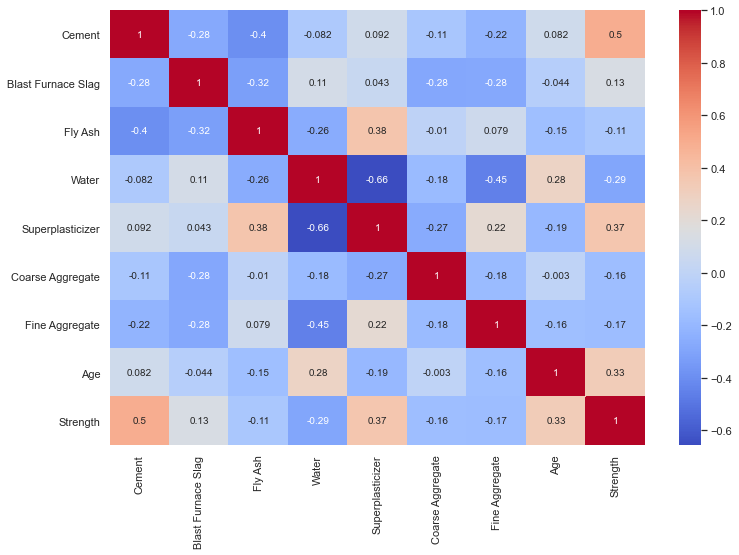

In [7]:
plt.figure (figsize = (12,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = 'coolwarm', annot = True)
sns.set(font_scale=1)

**Notes**: 
- Strong correlation between strength and cement. 
- Moderate correlation between strength and water, sperplasticiser and Age. 
- Will examine if I need to include the other features or not later.

### 2.2: Pairplot

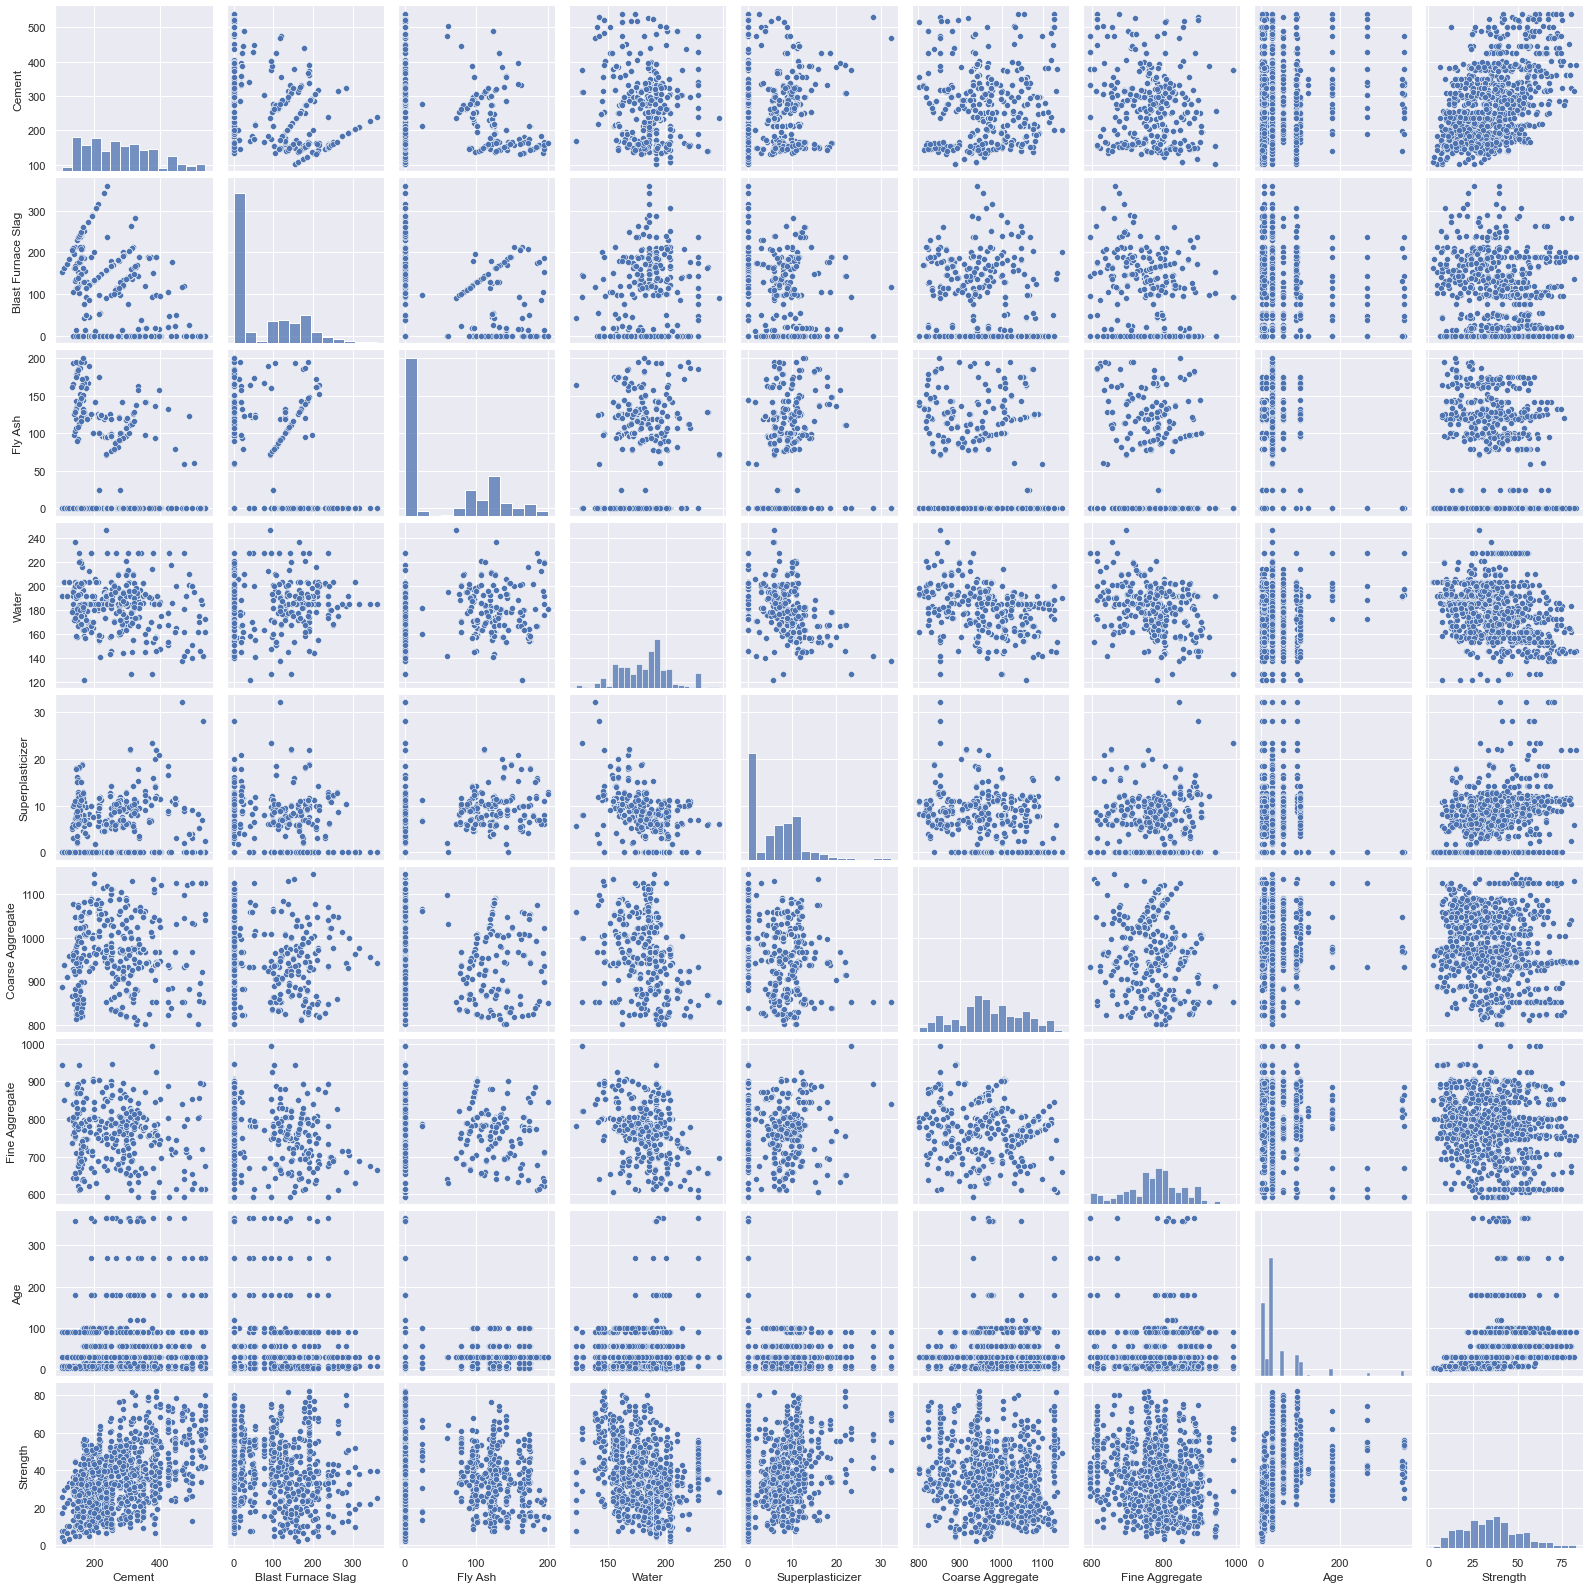

In [8]:
sns.pairplot(concrete)

Pairplot confirms the data from the correlation matrix.

### 2.3 Plots

#### Histogram of strength

No handles with labels found to put in legend.


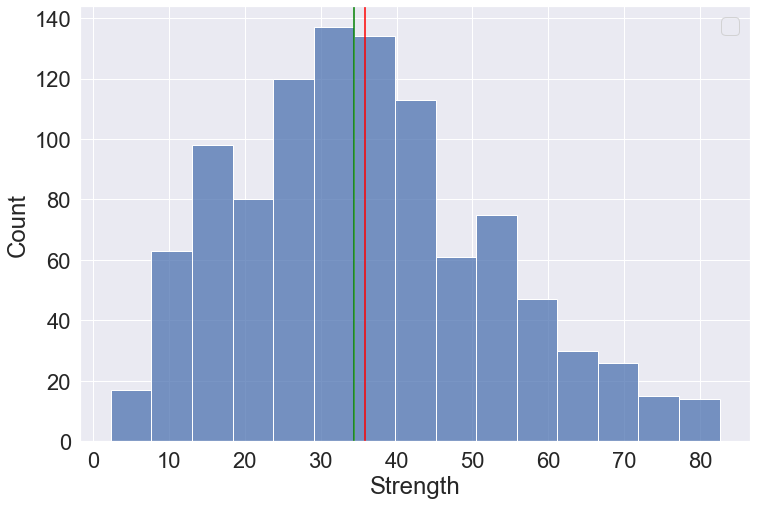

In [128]:
fig = plt.figure(figsize = (12,8));
sns.set(font_scale=2)
sns.set_style("darkgrid")
plt.axvline(x=concrete['Strength'].mean(), color='red') 
plt.axvline(x=concrete['Strength'].median(), color='green')
p = sns.histplot(data=concrete, x="Strength", bins = 15)
# plt.legend (loc = 'best')

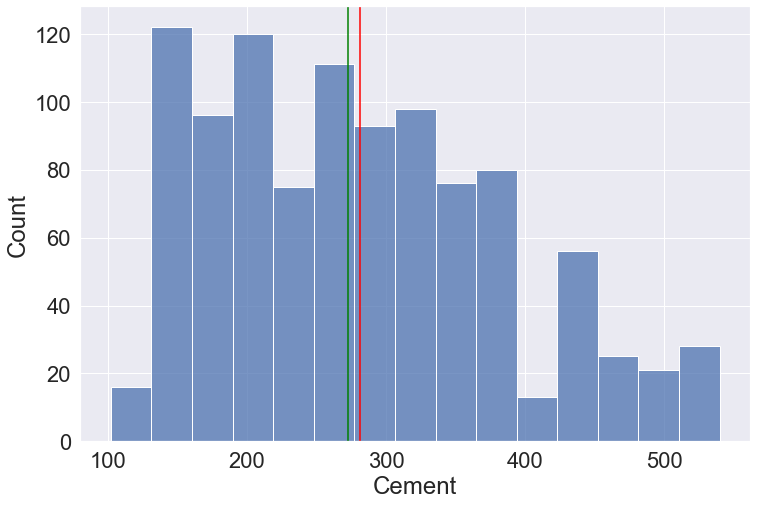

In [10]:
fig = plt.figure(figsize = (12,8));
sns.set(font_scale=2)
sns.set_style("darkgrid")
plt.axvline(x=concrete['Cement'].mean(), color='red') 
plt.axvline(x=concrete['Cement'].median(), color='green')
p = sns.histplot(data=concrete, x="Cement", bins = 15)

#### KDE plot

<Figure size 864x576 with 0 Axes>

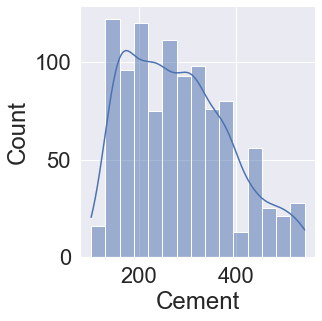

In [11]:
fig = plt.figure(figsize = (12,8))
sns.displot(concrete['Cement'], kde = True)

plt.show()

<Figure size 864x576 with 0 Axes>

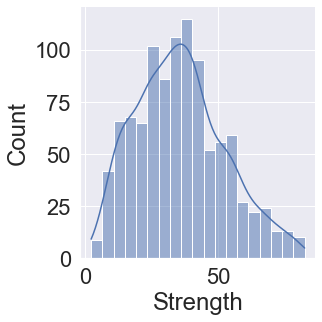

In [12]:
fig = plt.figure(figsize = (12,8))
sns.displot(concrete['Strength'], kde = True)

plt.show()

In [13]:
stats.ttest_ind(concrete["Strength"], concrete["Cement"]) #the [1] shows the p_value

Ttest_indResult(statistic=-74.4016652932058, pvalue=0.0)

#### Strength vs cement and Superplasticizer

<AxesSubplot:xlabel='Superplasticizer', ylabel='Strength'>

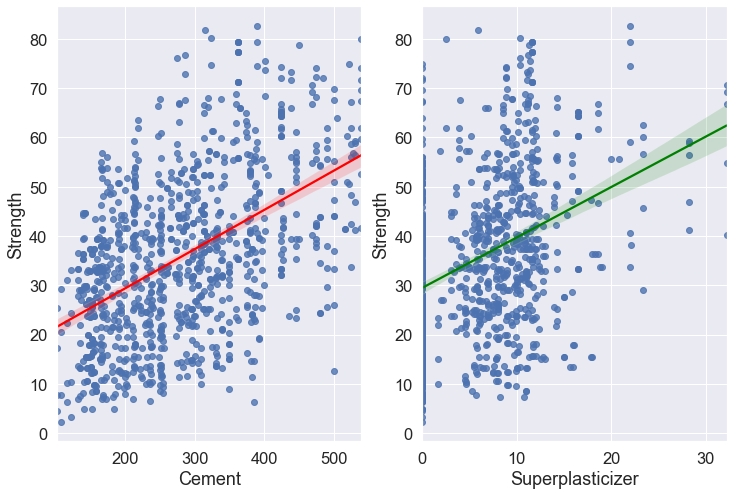

In [14]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale=1.5)
#sns.lmplot(x = 'Cement', y = 'Strength', data = concrete,line_kws={'color': 'red'}); #markers are optional
f, axes = plt.subplots(1, 2)
sns.regplot(x = 'Cement', y = 'Strength', data = concrete,line_kws={'color': 'red'}, ax = axes[0])
sns.regplot(x = 'Superplasticizer', y = 'Strength', data = concrete,line_kws={'color': 'green'}, ax = axes[1])

Good correlation. Positive.

#### Age vs strength

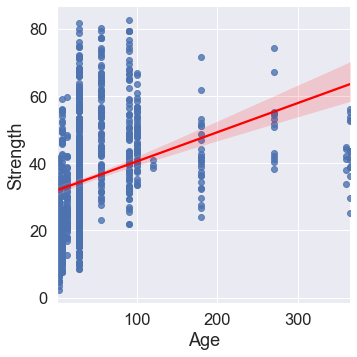

In [15]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale=1.5)
sns.lmplot(x = 'Age', y = 'Strength', data = concrete,line_kws={'color': 'red'}); #markers are optional

**Note**: positive correlation

**Note**: I wanted to test if I could make a 3D graph using the above two features, but I couldn't make it look great. Data is not strongly correlated with itself (neither should it, these are different items alltogether in real life).

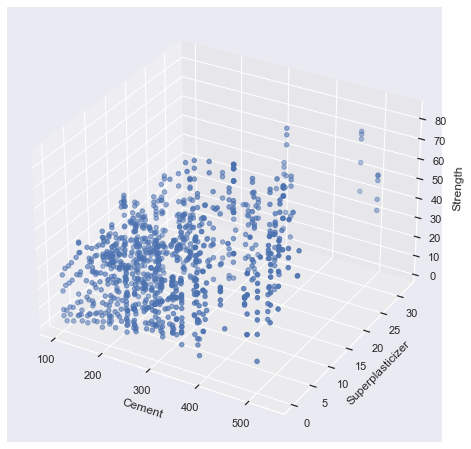

In [16]:
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# defining all 3 axes
z = concrete['Strength']
x = concrete['Cement']
y = concrete['Superplasticizer']


ax.set_xlabel("Cement")
ax.set_ylabel("Superplasticizer")
ax.set_zlabel("Strength")

ax.scatter(x, y, z)

plt.show()

Might scrap this, not great insights. Too much noise and many data points.

## 3. Modelling

The modelling process will be as follows:
1. Assign the target variable as **Strength**.
2. Assign the predictors as all variables, but will play around with different variables to see if I need to include them all.
3. Will use boosting and stacking methods to get the highest r2 score possible. I will use the model with the highest test score and least overfitting as my predictor.

In [17]:
scaler = StandardScaler()

In [18]:
y = concrete['Strength']

In [19]:
X = concrete.drop('Strength', axis = 1)

In [20]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [21]:
# Test-train split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
# Scale the training set and convert to dataframe
X_train2 = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train2, columns =X_test.columns)

In [23]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.160877,0.857387,0.982449,-0.314285,1.481654,-0.257462,-0.647520,-0.275673
1,1.308623,-0.602492,1.232598,-0.178192,0.391715,-1.926950,-0.273148,-0.275673
2,-0.076865,-0.855584,1.066874,-1.046371,0.626471,1.017859,0.066628,-0.689313
3,-0.291807,0.260321,0.357076,0.572666,0.307873,-1.761654,0.604093,-0.275673
4,-1.065038,-0.370108,1.112214,-1.102686,0.777385,1.363709,0.297676,-0.689313


In [24]:
# transform the test set using the training scaler.
X_test2 = scaler.transform(X_test)
X_test = pd.DataFrame(X_test2, columns =X_train.columns)

In [25]:
X_test.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-0.161539,0.455892,-0.831134,2.168238,-1.033590,-0.528292,-1.261589,5.300197
1,0.737307,1.318705,-0.831134,-0.792957,0.911532,-0.366811,-0.201486,-0.623131
2,0.991329,1.318705,-0.831134,-1.684600,2.655434,-0.366811,-0.201486,-0.275673
3,0.737307,1.318705,-0.831134,-0.792957,0.911532,-0.366811,-0.201486,-0.689313
4,-1.287423,-0.855584,1.967412,0.948095,0.307873,-1.901519,1.197157,-0.275673


### 3.1 Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [27]:
reg.fit(X_train, y_train)

LinearRegression()

In [28]:
score_train = reg.score(X_train, y_train)

score_test = reg.score(X_test, y_test)

print (score_train, score_test)

0.6105238047649741 0.6275531792314848


**Notes**: Not great accuracy, somewhat expected from LinReg with this data.

Below, I used polynomial regression, which improved the data prediction significantly.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
interaction = PolynomialFeatures(
    degree = 4, 
    include_bias = False, interaction_only = True)
interaction_x = interaction.fit_transform(X_train)
regression = LinearRegression()
model = regression.fit(interaction_x, y_train)

**Note**: I chose 4 degrees as that gave me the best accuracy

In [31]:
# score_train = model.score(X_train, y_train)

# score_test = model.score(X_test, y_test)

# print (score_train, score_test)

model.score(interaction_x, y_train)

0.8589528612012215

### 3.2: Random Forest Regressor

I am using RFR as a bagging ensemble method that uses deision trees as its base estimator.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
forest_params = [{'n_estimators': [100,1000], 'max_depth': list(range(2, 15))}]

In [33]:
#grid = GridSearchCV(RandomForestRegressor(random_state=42), forest_params, cv = 8, scoring='accuracy', n_jobs = -1)
#grid.fit(X_train, y_train)

In [34]:
#grid.best_params_

In [35]:
#grid.best_score_

In [36]:
reg = RandomForestRegressor(random_state=42)

In [37]:
# Fit model
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Evaluate model against training setreg
reg.score(X_train, y_train)

0.986155960544655

In [39]:
score_test = reg.score(X_test, y_test)
score_train = reg.score(X_train, y_train)
print (score_train, score_test)

0.986155960544655 0.8841688335094583


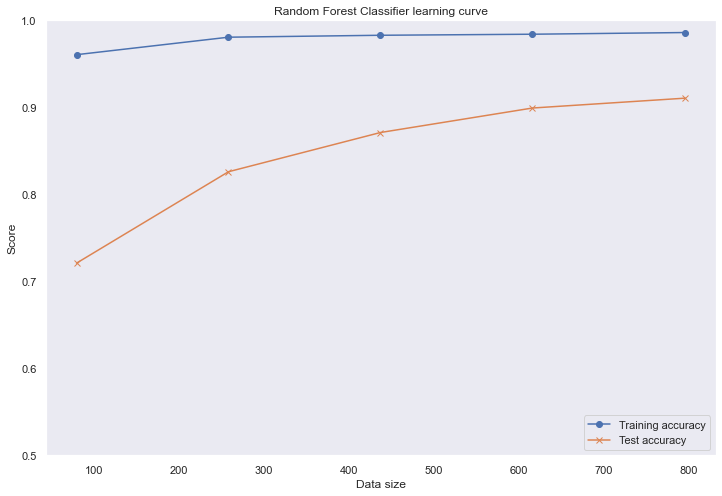

In [40]:
from sklearn.model_selection import learning_curve
estimator = RandomForestRegressor(random_state=42)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train, y_train, cv=30,return_times=True, n_jobs = -1)

plt.figure (figsize = (12,8))
plt.plot(train_sizes,np.mean(train_scores,axis=1), label = 'Training accuracy', marker = 'o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), label = 'Test accuracy', marker = 'x')
plt.ylim ([0.5, 1])
plt.xlabel('Data size')
plt.ylabel('Score')
plt.title('Random Forest Classifier learning curve')
plt.grid()
plt.legend(loc="lower right")

In [41]:
# Calculate the score for Testing Data
score_test = reg.score(X_test, y_test)
score_train = reg.score(X_train, y_train)
print (score_train, score_test)

0.986155960544655 0.8841688335094583


**Notes**: Very good training accuracy, and acceptable test accuracy. I want the accuracy to be higher than 90%

### 3.3: Adaboost

Adaptive Boosting will be the first of my boosting techniques, to see if I can get an accuracy higher than 90%

In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
regr = AdaBoostRegressor(random_state=42, n_estimators=100)
regr.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [43]:
score_test = regr.score(X_test, y_test)
score_train = regr.score(X_train, y_train)
print (score_train, score_test)

0.8343872107495982 0.7727702688312691


Not Great.

### 3.4: Gradient Boost Regressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [45]:
score_test = reg.score(X_test, y_test)
score_train = reg.score(X_train, y_train)
print (score_train, score_test)

0.9472345764056596 0.8828886141958622


**Notes**: Fairly similar to the Random Forest Regressor. Will keep trying other methods.

### 3.5: XGBoost

In [46]:
import xgboost as xgb
from sklearn import metrics

In [47]:
xmodel = xgb.XGBRegressor(random_State=42)

In [48]:
xmodel.fit(X_train, y_train)

[11:27:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "random_State" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_State=42,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [49]:
expected_y  = np.copy(y_test)
predicted_y = xmodel.predict(X_test)

In [50]:
print(metrics.r2_score(expected_y, predicted_y))

0.9022997499470038


0.9022997499470038
0.0209289930820291


C:\Users\matta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'predicted vs expected strength')

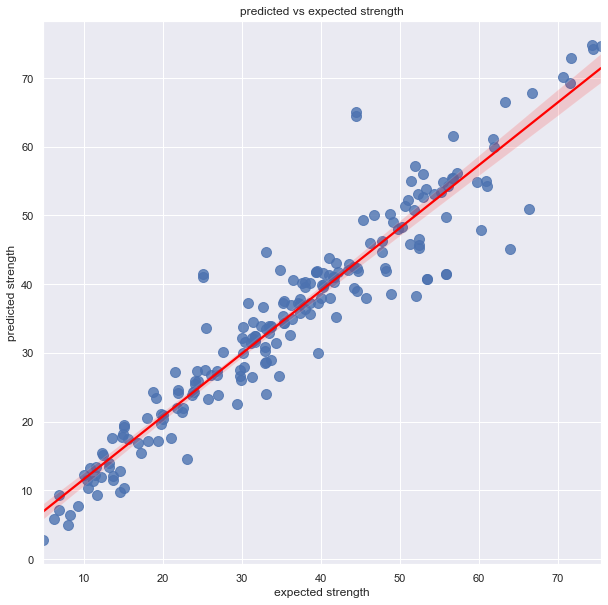

In [51]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100}, line_kws={'color': 'red'})
plt.xlabel ('expected strength')
plt.ylabel ('predicted strength')
plt.title ('predicted vs expected strength')

**Note**: This graph is a demonstration of the predicted vs expected strengths from the unseen data. If the model was 100% accurate, then all the dots would have been on the line, and the line has a gradient of 1.

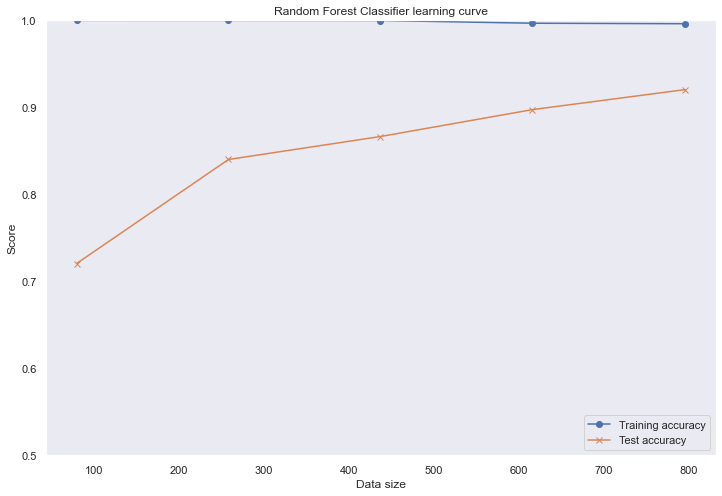

In [52]:
estimator = xmodel
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train, y_train, cv=30,return_times=True, n_jobs = -1)

plt.figure (figsize = (12,8))
plt.plot(train_sizes,np.mean(train_scores,axis=1), label = 'Training accuracy', marker = 'o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), label = 'Test accuracy', marker = 'x')
plt.ylim ([0.5, 1])
plt.xlabel('Data size')
plt.ylabel('Score')
plt.title('Random Forest Classifier learning curve')
plt.grid()
plt.legend(loc="lower right")

Fairly good learning curve, slight overfitting.

## 3.6: LightGBM

Light GBM is another boosting method. It utilises the binning of numerical values to speed up processing time, it can also be quite accurate. 

In [53]:
param_dist = {"max_depth": [5,10,15],
              "learning_rate" : [0.1,0.15,0.3],
              "num_leaves": [50,100,150,200],
              "n_estimators": [300,400]
             }

In [54]:
#lgbmodel = lgb.LGBMRegressor(random_state=42)

In [55]:
#grid_search = GridSearchCV(lgbmodel, param_grid=param_dist, cv = 5, n_jobs=-1)

In [56]:
#grid_search.fit(X_train, y_train)

In [57]:
#grid_search.best_params_

In [58]:
#grid_search.best_score_

In [59]:
model = lgb.LGBMRegressor(learning_rate=0.1,max_depth=10, n_estimators = 300, num_leaves = 50, random_state=42)

In [60]:
model.fit(X_train, y_train)

LGBMRegressor(max_depth=10, n_estimators=300, num_leaves=50, random_state=42)

In [61]:
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)
print (score_train, score_test)

0.9907237001223602 0.9217491141894656


**Notes**: High 'accuracy', or r2 score, for the test data. This is good.

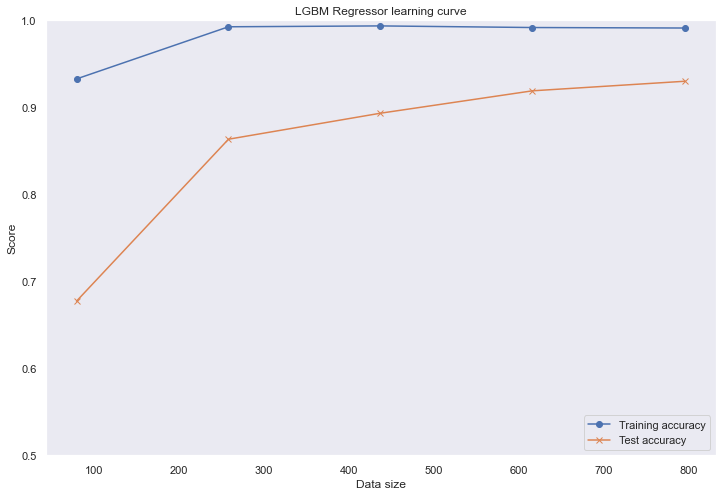

In [62]:
estimator = model
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train, y_train, cv=30,return_times=True, n_jobs = -1)

plt.figure (figsize = (12,8))
plt.plot(train_sizes,np.mean(train_scores,axis=1), label = 'Training accuracy', marker = 'o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), label = 'Test accuracy', marker = 'x')
plt.ylim ([0.5, 1])
plt.xlabel('Data size')
plt.ylabel('Score')
plt.title('LGBM Regressor learning curve')
plt.grid()
plt.legend(loc="lower right")

**So far LGMB is the best in terms of implementation, although XGBoost gave the same test accuracy**

## 3.7: Stacking regressor

I will be using stacking (specifically, StackingRegressor) to see if i can improve on the r2 score of 0.92 (from Light GBM) for the test data.

In [63]:
estimators = [
            ('lr', LinearRegression()),
            ('gbr', GradientBoostingRegressor(random_state=42)),
            ('svr', LinearSVR(random_state=42)), 
            ('ada', AdaBoostRegressor(random_state=42))]

In [64]:
stack = StackingRegressor(estimators=estimators,
        final_estimator=RandomForestRegressor(random_state=42))

In [65]:
stack.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('gbr',
                               GradientBoostingRegressor(random_state=42)),
                              ('svr', LinearSVR(random_state=42)),
                              ('ada', AdaBoostRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [66]:
score_test = stack.score(X_test, y_test)
score_train = stack.score(X_train, y_train)
print (score_train, score_test)

0.9469818124841132 0.8806721412494272


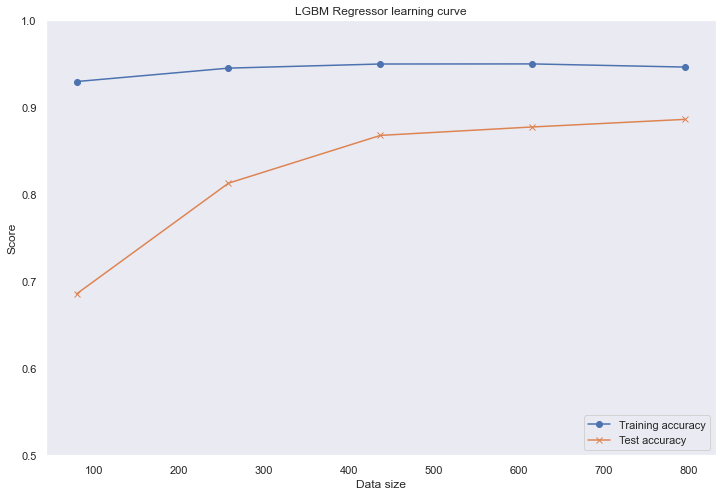

In [67]:
estimator = stack
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train, y_train, cv=30,return_times=True, n_jobs = -1)

plt.figure (figsize = (12,8))
plt.plot(train_sizes,np.mean(train_scores,axis=1), label = 'Training accuracy', marker = 'o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), label = 'Test accuracy', marker = 'x')
plt.ylim ([0.5, 1])
plt.xlabel('Data size')
plt.ylabel('Score')
plt.title('LGBM Regressor learning curve')
plt.legend(loc="lower right")
plt.grid()

## 4: Conclusion

Light GBM produced the most accuracte model, with the highest r2 score (0.92) on unseen data and had the best learning curve when compared to the other models. As a result, we can accurately predict how strong concrete will be given inputs provided by the client, before they begin producing the concrete en masse.

## 5: Proof of concept: Predicting concrete strength using class feature inputs

I will use the LightGBM regressor to predict the strength of concrete using client parameters

In [112]:
student = r'C:\Users\matta\Downloads\Data\Concrete Strength mixture values (Responses) - Form Responses 1.csv'
student_main = pd.read_csv(student)

In [113]:
student_main.head()

,Timestamp,Cement (50-700),Blast Furnace Slag (0-600),Fly Ash (0-400),Water (0-100),Superplasticizer (0-80),Coarse Aggregate (700-1200),Fine Aggregate (500-1100),Age (0-500),Name
0,1/4/2022 14:26:56,400,300,200,50,40,900,800,250,NaN
1,1/4/2022 14:27:35,50,200,100,24,16,800,600,25,NaN
2,1/4/2022 14:39:02,234,456,123,24,55,889,1000,27,Matt 1
3,1/4/2022 14:39:34,700,65,246,88,50,999,650,230,Matt 2
4,1/10/2022 11:53:34,500,400,100,200,10,600,700,300,Sam


In [114]:
student_main.set_index(student_main.pop('Name'), inplace=True)

In [115]:
student_main

,Timestamp,Cement (50-700),Blast Furnace Slag (0-600),Fly Ash (0-400),Water (0-100),Superplasticizer (0-80),Coarse Aggregate (700-1200),Fine Aggregate (500-1100),Age (0-500)
Name,,,,,,,,,
NaN,1/4/2022 14:26:56,400,300,200,50,40,900,800,250
NaN,1/4/2022 14:27:35,50,200,100,24,16,800,600,25
Matt 1,1/4/2022 14:39:02,234,456,123,24,55,889,1000,27
Matt 2,1/4/2022 14:39:34,700,65,246,88,50,999,650,230
Sam,1/10/2022 11:53:34,500,400,100,200,10,600,700,300
Joel,1/10/2022 11:53:59,200,100,200,50,70,700,500,130
manju,1/10/2022 11:54:35,450,200,200,70,60,1000,700,350
Derwin,1/10/2022 11:55:18,250,250,250,250,250,250,250,250
Novak,1/10/2022 11:55:21,300,150,150,50,70,400,400,480


In [116]:
#student = student_main.copy()

In [117]:
#student

In [118]:
student_main.drop('Timestamp', axis = 1, inplace = True)

In [119]:
student_main.head()

,Cement (50-700),Blast Furnace Slag (0-600),Fly Ash (0-400),Water (0-100),Superplasticizer (0-80),Coarse Aggregate (700-1200),Fine Aggregate (500-1100),Age (0-500)
Name,,,,,,,,
NaN,400,300,200,50,40,900,800,250
NaN,50,200,100,24,16,800,600,25
Matt 1,234,456,123,24,55,889,1000,27
Matt 2,700,65,246,88,50,999,650,230
Sam,500,400,100,200,10,600,700,300


In [120]:
student2 = scaler.transform(student_main)
X_student = pd.DataFrame(student2, columns =X_test.columns)

In [121]:
X_student

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.085307,2.595668,2.295733,-6.185054,5.673727,-0.935175,0.344627,3.397452
1,-2.171381,1.445251,0.732300,-7.405198,1.649337,-2.206681,-2.126474,-0.325310
2,-0.459294,4.390319,1.091889,-7.405198,8.188972,-1.075040,2.815729,-0.292219
3,3.876755,-0.107813,3.014912,-4.401767,7.350557,0.323617,-1.508699,3.066540
4,2.015790,3.746085,0.732300,0.854237,0.643239,-4.749694,-0.890924,4.224733
5,-0.775658,0.294833,2.295733,-6.185054,10.704216,-3.478188,-3.362025,1.411979
6,1.550548,1.445251,2.295733,-5.246482,9.027386,0.336332,-0.890924,5.052013
7,-0.310416,2.020459,3.077449,3.200668,40.887146,-9.199967,-6.450902,3.397452
8,0.154825,0.870042,1.514016,-6.185054,10.704216,-7.292707,-4.597576,7.202942
9,3.876755,6.046919,5.422599,-3.838624,12.381045,2.879345,4.051280,7.533855


In [122]:
y_student = model.predict(X_student)

In [123]:
y_student = np.round(y_student, 2)

In [124]:
student_main['Student concrete strength'] = y_student.tolist()

In [125]:
student_main

,Cement (50-700),Blast Furnace Slag (0-600),Fly Ash (0-400),Water (0-100),Superplasticizer (0-80),Coarse Aggregate (700-1200),Fine Aggregate (500-1100),Age (0-500),Student concrete strength
Name,,,,,,,,,
NaN,400,300,200,50,40,900,800,250,75.48
NaN,50,200,100,24,16,800,600,25,34.89
Matt 1,234,456,123,24,55,889,1000,27,51.38
Matt 2,700,65,246,88,50,999,650,230,66.43
Sam,500,400,100,200,10,600,700,300,68.69
Joel,200,100,200,50,70,700,500,130,57.15
manju,450,200,200,70,60,1000,700,350,76.11
Derwin,250,250,250,250,250,250,250,250,53.17
Novak,300,150,150,50,70,400,400,480,63.35


In [126]:
student_main.loc[['Sam']]

,Cement (50-700),Blast Furnace Slag (0-600),Fly Ash (0-400),Water (0-100),Superplasticizer (0-80),Coarse Aggregate (700-1200),Fine Aggregate (500-1100),Age (0-500),Student concrete strength
Name,,,,,,,,,
Sam,500,400,100,200,10,600,700,300,68.69


## Well done, everyone!

## Extracting the coefficients

In [83]:
model.feature_importances_

array([1201,  626,  334, 1048,  641, 1151,  948,  821])

In [84]:
model.feature_name_

['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age']

In [85]:
for col in zip(model.feature_name_, model.feature_importances_):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # List of coefficients by predictor

Cement      +1201.000000
Blast_Furnace_Slag  +626.000000
Fly_Ash     +334.000000
Water       +1048.000000
Superplasticizer  +641.000000
Coarse_Aggregate  +1151.000000
Fine_Aggregate  +948.000000
Age         +821.000000


In [86]:
coeffs = pd.DataFrame({'Features': model.feature_name_, 'Feature importances': model.feature_importances_}, columns=['Features', 'Feature importances'])

In [87]:
coeffs

,Features,Feature importances
0,Cement,1201
1,Blast_Furnace_Slag,626
2,Fly_Ash,334
3,Water,1048
4,Superplasticizer,641
5,Coarse_Aggregate,1151
6,Fine_Aggregate,948
7,Age,821


**Those are the feature importances when making the model**

## PCA

**Note**: In the code below, I wanted to find out if I needed to use all of the components when making the prediction. I can probably get away with using just 6. I will try that here.

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca=PCA()

In [90]:
pc = pca.fit_transform(X_train)

In [91]:
pca.explained_variance_ratio_

array([0.28019088, 0.17909394, 0.16827629, 0.12802619, 0.11811602,
       0.09938551, 0.02303032, 0.00388084])

In [92]:
pca=PCA(n_components = 6)
pc = pca.fit_transform(X_train)

In [93]:
pca.explained_variance_ratio_

array([0.28019088, 0.17909394, 0.16827629, 0.12802619, 0.11811602,
       0.09938551])

In [94]:
pcx = pca.transform(X_test)

In [95]:
pcdf = pd.DataFrame(data = pc
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

In [96]:
pcdf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-1.175572,1.222351,-0.835258,-0.737277,1.206229,0.292764
1,-0.802163,0.275023,1.140729,0.816967,1.382623,-1.513356
2,-1.610347,-1.226806,-0.458107,-0.707043,0.240320,-0.114362
3,-0.414377,1.429764,0.068798,1.144081,0.185305,-0.826430
4,-1.857663,-0.789078,-1.287309,-0.875359,-0.020018,0.443568
...,...,...,...,...,...,...
819,-1.172252,0.939456,0.775646,-1.541611,-0.975213,1.046340
820,-2.297248,-1.443258,-0.514715,-0.899718,0.104433,0.580475
821,-1.169188,-1.347934,-1.077688,0.195474,0.618922,1.241461
822,0.144111,0.989516,2.263119,0.169337,-0.002934,-0.736505


In [97]:
pcxdf = pd.DataFrame(data = pcx
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

In [98]:
pcxdf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,4.093815,0.172440,0.130800,2.542405,2.240629,2.888185
1,-0.415039,1.190525,1.345524,-1.216740,-0.236701,0.211892
2,-1.665982,1.304197,2.263407,-1.558491,0.467073,0.988888
3,-0.434208,1.198312,1.338714,-1.247647,-0.261957,0.164015
4,-1.373505,0.867888,-1.386164,2.326961,0.723147,-1.365592
...,...,...,...,...,...,...
201,-0.688281,-0.806265,1.477561,-0.521443,1.178555,-0.117925
202,-0.032932,0.140059,0.141489,2.056291,-1.960859,-0.656227
203,-1.153083,0.931669,0.782456,-1.510704,-0.949957,1.094217
204,-0.958006,0.179018,1.309363,0.895994,1.527787,-0.995915


### Using LightGBM

In [99]:
lgbmodel = lgb.LGBMRegressor(random_state=42)

In [100]:
#grid_search = GridSearchCV(lgbmodel, param_grid=param_dist, cv = 5, n_jobs=-1)

In [101]:
#grid_search.fit(pcdf, y_train)

In [102]:
#grid_search.best_params_

In [103]:
model2 = lgb.LGBMRegressor(learning_rate=0.1,max_depth=10, n_estimators = 300, num_leaves = 50, random_state=42)

In [104]:
model2.fit(pcdf, y_train)

LGBMRegressor(max_depth=10, n_estimators=300, num_leaves=50, random_state=42)

In [105]:
score_test = model2.score(pcxdf, y_test)
score_train = model2.score(pcdf, y_train)
print (score_train, score_test)

0.990257982887486 0.7839422210942614


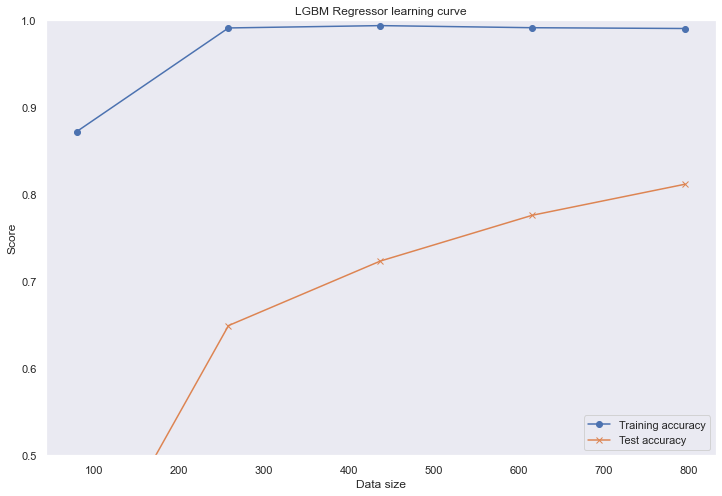

In [106]:
estimator = model2
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, pcdf, y_train, cv=30,return_times=True, n_jobs = -1)

plt.figure (figsize = (12,8))
plt.plot(train_sizes,np.mean(train_scores,axis=1), label = 'Training accuracy', marker = 'o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), label = 'Test accuracy', marker = 'x')
plt.ylim ([0.5, 1])
plt.xlabel('Data size')
plt.ylabel('Score')
plt.title('LGBM Regressor learning curve')
plt.grid()
plt.legend(loc="lower right")

### GBR

In [107]:
reg = GradientBoostingRegressor(random_state=42)
reg.fit(pcdf, y_train)

GradientBoostingRegressor(random_state=42)

In [108]:
score_test = reg.score(pcxdf, y_test)
score_train = reg.score(pcdf, y_train)
print (score_train, score_test)

0.8889558977056915 0.7618187951369944


### Random Forest Regressor

In [109]:
reg = RandomForestRegressor(random_state=42)

In [110]:
reg.fit(pcdf, y_train)

RandomForestRegressor(random_state=42)

In [111]:
score_test = reg.score(pcxdf, y_test)
score_train = reg.score(pcdf, y_train)
print (score_train, score_test)

0.9678192409957583 0.7991309536256838


**Notes**:
- Using PCA is actually causing a lot of overfitting. I thought the opposite would happen. This is happening with all the three regressors that I used.
- Any idea why this is happening? Is it a co-variance issue with the features i used?